In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import value_counts
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
path = "C:\\Users\\Hp\\OneDrive\\Desktop\\PYTHON FOLDER\\kc_house_data.csv"
df = pd.read_csv(path, header=None)
print(df.head())


           0                1       2         3          4            5   \
0          id             date   price  bedrooms  bathrooms  sqft_living   
1  7129300520  20141013T000000  221900         3          1         1180   
2  6414100192  20141209T000000  538000         3       2.25         2570   
3  5631500400  20150225T000000  180000         2          1          770   
4  2487200875  20141209T000000  604000         4          3         1960   

         6       7           8     9   ...     11          12             13  \
0  sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement   
1      5650       1           0     0  ...      7        1180              0   
2      7242       2           0     0  ...      7        2170            400   
3     10000       1           0     0  ...      6         770              0   
4      5000       1           0     0  ...      7        1050            910   

         14            15       16       17        18         

In [28]:
# Data Wrangling
df.columns = [str(col).strip() for col in df.columns]
print(df.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


In [30]:
df.drop('0', axis=1, inplace=True)

In [31]:
df.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614
unique,373,4029,14,31,1039,9783,7,3,6,6,13,947,307,117,71,71,5035,753,778,8690
top,20140623T000000,450000,3,2.5,1300,5000,1,0,0,3,7,1300,0,2014,0,98103,47.6624,-122.29,1540,5000
freq,142,172,9824,5380,138,358,10680,21450,19489,14031,8981,212,13126,559,20699,602,17,116,197,427


In [33]:
print (df.head())

                 1       2         3          4            5         6  \
0             date   price  bedrooms  bathrooms  sqft_living  sqft_lot   
1  20141013T000000  221900         3          1         1180      5650   
2  20141209T000000  538000         3       2.25         2570      7242   
3  20150225T000000  180000         2          1          770     10000   
4  20141209T000000  604000         4          3         1960      5000   

        7           8     9         10     11          12             13  \
0  floors  waterfront  view  condition  grade  sqft_above  sqft_basement   
1       1           0     0          3      7        1180              0   
2       2           0     0          3      7        2170            400   
3       1           0     0          3      6         770              0   
4       1           0     0          5      7        1050            910   

         14            15       16       17        18             19  \
0  yr_built  yr_renovated 

In [34]:
df.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21614 entries, 0 to 21613
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       21614 non-null  object
 1   2       21614 non-null  object
 2   3       21614 non-null  object
 3   4       21614 non-null  object
 4   5       21614 non-null  object
 5   6       21614 non-null  object
 6   7       21614 non-null  object
 7   8       21614 non-null  object
 8   9       21614 non-null  object
 9   10      21614 non-null  object
 10  11      21614 non-null  object
 11  12      21614 non-null  object
 12  13      21614 non-null  object
 13  14      21614 non-null  object
 14  15      21614 non-null  object
 15  16      21614 non-null  object
 16  17      21614 non-null  object
 17  18      21614 non-null  object
 18  19      21614 non-null  object
 19  20      21614 non-null  object
dtypes: object(20)
memory usage: 3.3+ MB


In [36]:
print('number of NaN values for the column 3 :', df['3'].isnull().sum())
print('number of NaN values for the column 4 :', df['4'].isnull().sum())

number of NaN values for the column 3 : 0
number of NaN values for the column 4 : 0


In [38]:
df.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614,21614
unique,373,4029,14,31,1039,9783,7,3,6,6,13,947,307,117,71,71,5035,753,778,8690
top,20140623T000000,450000,3,2.5,1300,5000,1,0,0,3,7,1300,0,2014,0,98103,47.6624,-122.29,1540,5000
freq,142,172,9824,5380,138,358,10680,21450,19489,14031,8981,212,13126,559,20699,602,17,116,197,427


In [40]:
# Value counts for Floor
floor_counts = df['7'].value_counts()
print(floor_counts)

7
1         10680
2          8241
1.5        1910
3           613
2.5         161
3.5           8
floors        1
Name: count, dtype: int64


In [41]:
#coverting value count to dataframe
floor_counts_df = floor_counts.to_frame()
print(floor_counts_df)

        count
7            
1       10680
2        8241
1.5      1910
3         613
2.5       161
3.5         8
floors      1


In [48]:
floor_counts = df['7'].value_counts()
floor_counts_df = floor_counts.to_frame()
floor_counts_df = floor_counts_df.rename(columns={0:'count'})
print(floor_counts_df)

        count
7            
1       10680
2        8241
1.5      1910
3         613
2.5       161
3.5         8
floors      1


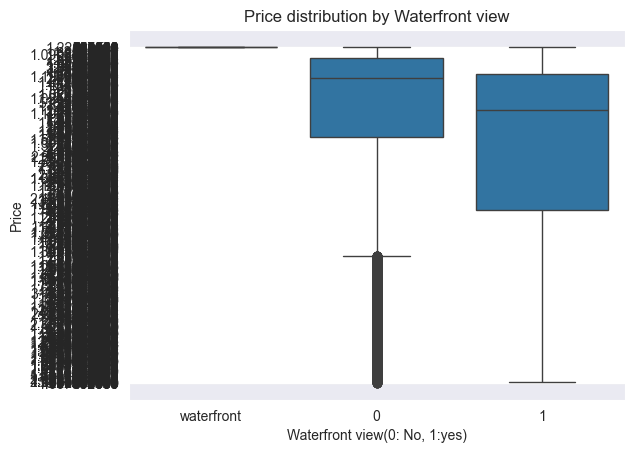

In [52]:
# Using boxplot to determine whether houses with waterfront have more rice outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='8', y='2', data=df)
plt.title('Price distribution by Waterfront view')
plt.xlabel('Waterfront view' '(0: No, 1:yes)')
plt.ylabel('Price')
plt.show()

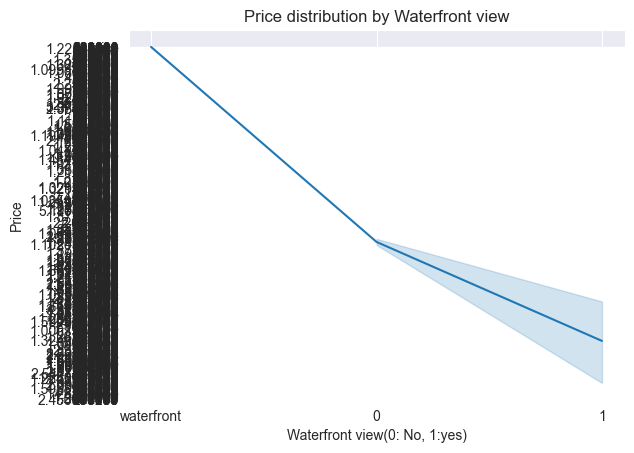

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x='8', y='2', data=df)
plt.title('Price distribution by Waterfront view')
plt.xlabel('Waterfront view' '(0: No, 1:yes)')
plt.ylabel('Price')
plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

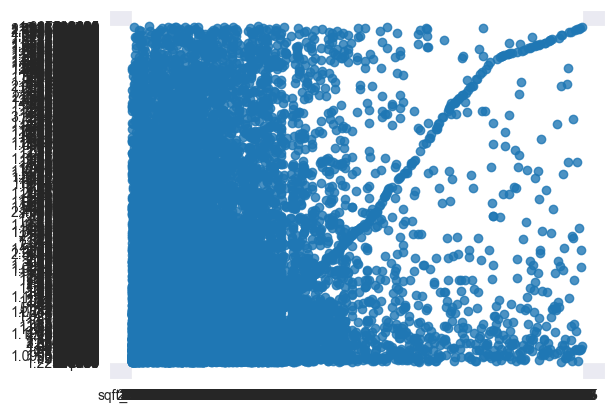

In [57]:
# Using regplot to determine whether sq-ft is negatvely of positively correlated to price
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.regplot(x='12', y='2', data=df)
plt.title('Relationships btw sq-ft_above and price')
plt.xlabel('sq-ft_bove')
plt.ylabel('Price')
plt.show()

In [75]:
# to fit a linear regression model using the sqft-living
x = df[['5']]
y = df[['2']]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)
print(lm.score(x,y))

0.4928532179037931


In [76]:

x = df[['19']]
y = df[['2']]
lm = LinearRegression()
lm.fit(x,y)
lm.score(x,y)
print(lm.score(x,y))

0.3426684607560172


In [68]:
#fitting a linear reg to predict price (2) using lists of features: floors(3), waterfront(),lat(),bedrooms(),Sft-basmt(),view(),bathrooms(),sqft-living15(19),sft-above(),grade(),sqftliving(5)
z = df [['3', '4', '5', '7', '8', '9', '11', '12','13', '17', '19']]
y = df [['2']]
lm = LinearRegression()
lm.fit(z,y)
lm.score(z,y)
print(lm.score(z,y))

0.6577151058279326


In [69]:
# creating a training pipeline that use StandardScaler, Polynomial, & Linear Regression to create a model that can predict the price values using all other attributes of the dataset--y & z use same values as defined in the previous cells
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

Input = [('Scale', StandardScaler()), ('poly', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
z = z.astype(float)
pipe.fit(z, y)
ypipe = pipe.predict(z)
print(r2_score(y, ypipe))


0.7513467656307783


In [72]:
# Model Refinement
##splitting the data into training and testing subset reserving 20% of the dataset-- z & y hold same values as in previous
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.15, random_state=1)
print('number of test samples:', x_test.shape[0])
print('number of training samples:', x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [73]:
# Initializing a Ridge regressor that use hyperparameter
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat=RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6480374087702243


In [74]:
# Applying polynoimial transformation to the training parameter with degree=2. fitting to the same regression model above
## x_train, X_test, y_train, y_test hold same values as previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, yhat))

0.6480374087702243
